In [ ]:
import pandas as pd

In [ ]:
import automated_marketmaker_calculator as amm

# one click pipeline

In [ ]:
price_data = pd.read_csv('/historical_prices.csv')

raw_data = pd.read_csv("/historical_volumes.csv", index_col = False)

volume_data = raw_data['Volume']

mu = volume_data.describe().at['mean']
sigma = volume_data.describe().at['std']

volume_data_no_outlier = volume_data.copy()
volume_data_no_outlier = volume_data_no_outlier[(volume_data_no_outlier < mu+3*sigma) & (volume_data_no_outlier > mu-3*sigma)].reset_index(drop = True)

In [ ]:
# %%
# Simulation parameters
path_no = 100
periods_no = 260
captured_volume = 0.01

# Depositor inputs
total_investment_USD = 2000

# Depositor parameters
deposit_split_percentage = 0.5

# Pool inputs
amount_USD_pool_t0 = 9000
amount_y_pool_t0 = amount_USD_pool_t0/price_data['Adj Close'][max(price_data.index)-periods_no]

# Pool parameters
pool_fee = 0.01
fee_split_percentage = 0.5

99%


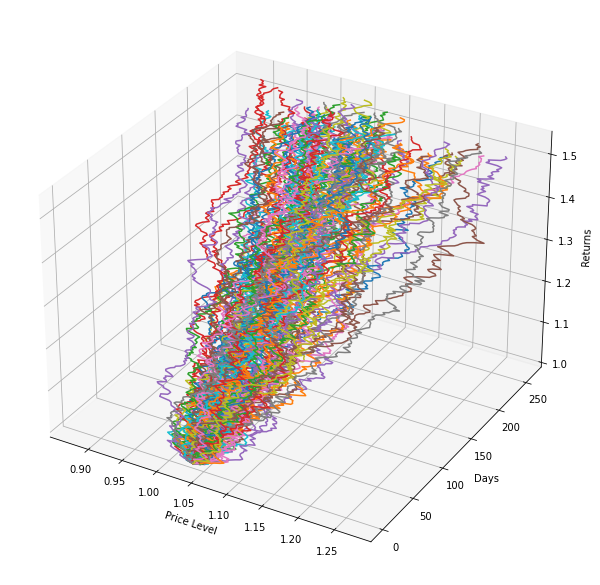

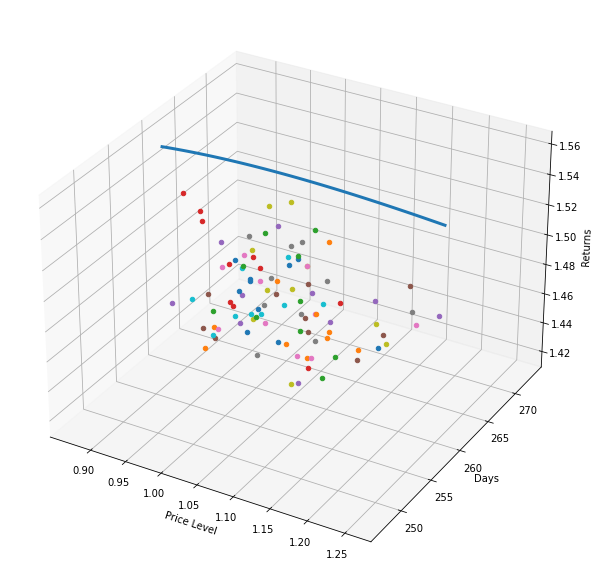

In [ ]:
pipeline = amm.one_pipeline(
        pool_fee = pool_fee, 
        amount_x_pool_t0 = amount_USD_pool_t0, 
        amount_y_pool_t0 = amount_y_pool_t0, 
        total_investment_x = amount_y_pool_t0, 
        max_paths = path_no, 
        deposit_split_percentage = deposit_split_percentage, 
        predicted_period = periods_no, 
        volume = volume_data_no_outlier,
        captured_volume_perc = captured_volume,
        FX_data = price_data, 
        ticker = '', 
        start_date = [], 
        end_date = [], 
        interval = '', 
        backtesting = True, 
        plot_sim = False
)

# Class by class pipeline

## Price simulation

In [ ]:
price_data = pd.read_csv('/Workspace/Users/daniel.malinovsky@moneta.cz/ML_concept/EURUSD=X.csv')

In [ ]:
price = amm.price_sim()

price.pipeline(FX_data = price_data,
                    ticker = 'EURUSD=X',
                    start_date=[2013,8,12],
                    end_date='today',
                    interval='1d',
                    predicted_period = 260,
                    backtesting = True)

## Volume simulation

In [ ]:
raw_data = pd.read_csv("/Workspace/Users/daniel.malinovsky@moneta.cz/ML_concept/^eurusd_price-history-08-12-2023.csv", index_col = False)

volume_data = raw_data['Volume']*2

mu = volume_data.describe().at['mean']
sigma = volume_data.describe().at['std']

volume_data_no_outlier = volume_data.copy()
volume_data_no_outlier = volume_data_no_outlier[(volume_data_no_outlier < mu+3*sigma) & (volume_data_no_outlier > mu-3*sigma)].reset_index(drop = True)

In [ ]:
volume = amm.volume_sim()

volume.pipeline(ticker = 'EURUSD=X',
                    volume = volume_data_no_outlier,
                    predicted_period = 260,
                    backtesting = True)

## Payoff calculation

In [ ]:
# %%
# Depositor inputs
total_investment_USD = 2000

# Depositor parameters
deposit_split_percentage = 0.5

# Pool inputs
amount_USD_pool_t0 = 9000
amount_y_pool_t0 = amount_USD_pool_t0/price.sim_df.iloc[0,0]

# Pool parameters
pool_fee = 0.01
fee_split_percentage = 0.5


In [ ]:
payoff = amm.payoff()

payoff.pipeline(
    pool_fee= 0.01,
    amount_x_pool_t0= amount_USD_pool_t0,
    amount_y_pool_t0= amount_y_pool_t0,
    total_investment_x= total_investment_USD,
    FX_timeseries = price.sim_df,
    volume_timeseries = volume.sim*0.01, 
    max_paths = 100,
    deposit_split_percentage = 0.5
)

99%


## Payoff visualisation

99%


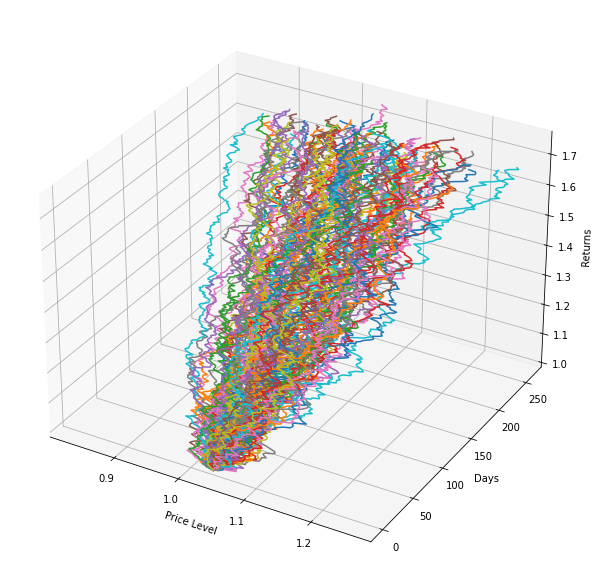

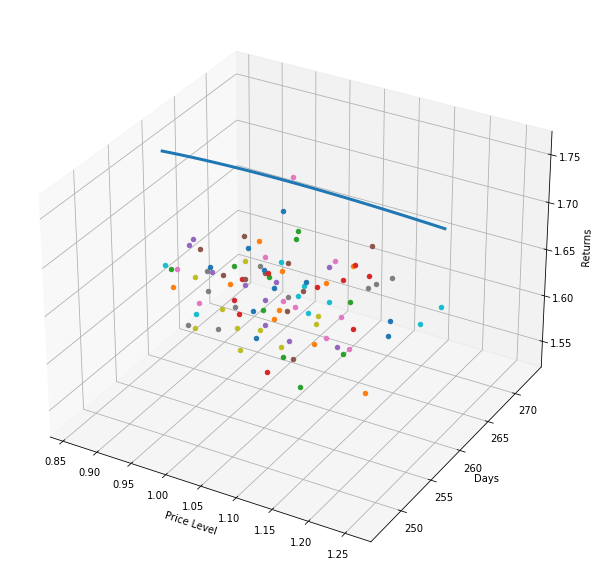

In [ ]:
plot = amm.visualisation(
    paths_df = payoff.paths_df,
    pool_performance = payoff.pool_performance
)

plot.path_plot()

plot.endpoint_plot()

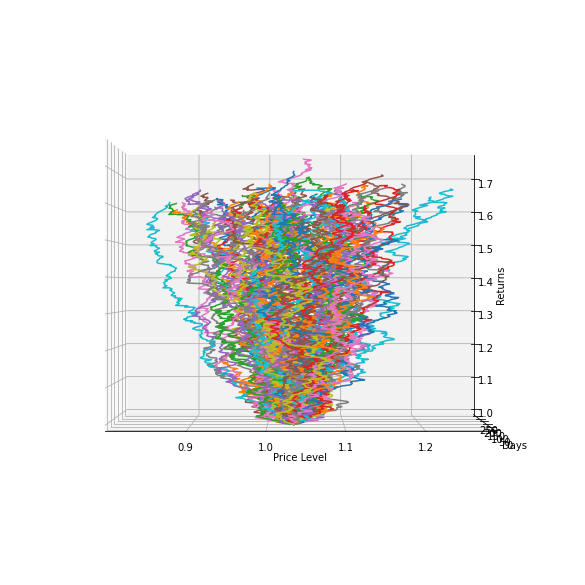

In [ ]:
plot.ax.view_init(0, 270)
plot.fig